## 1. 데이터 로드 및 구조 확인

In [64]:
import seaborn as sns
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [52]:
# 데이터셋 로드
iris = sns.load_dataset('iris')

In [53]:
# 데이터 구조 확인
print("**상위 5개 데이터**")
print(iris.head())

print("\n**데이터 정보**")
print(iris.info())


**상위 5개 데이터**
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

**데이터 정보**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## 2. 기술 통계량

In [17]:
# 1. Species별 Petal Length의 기술통계량 구하기
group_stats = iris.groupby('species')['petal_length'].describe()
print("**Species별 Petal Length 기술 통계량**\n", group_stats)

**Species별 Petal Length 기술 통계량**
             count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


In [18]:
# 2. 그룹별 데이터 개수 확인
print("**그룹별 데이터 개수**")
print(iris['species'].value_counts())

**그룹별 데이터 개수**
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. 시각화

<Axes: xlabel='species', ylabel='petal_length'>

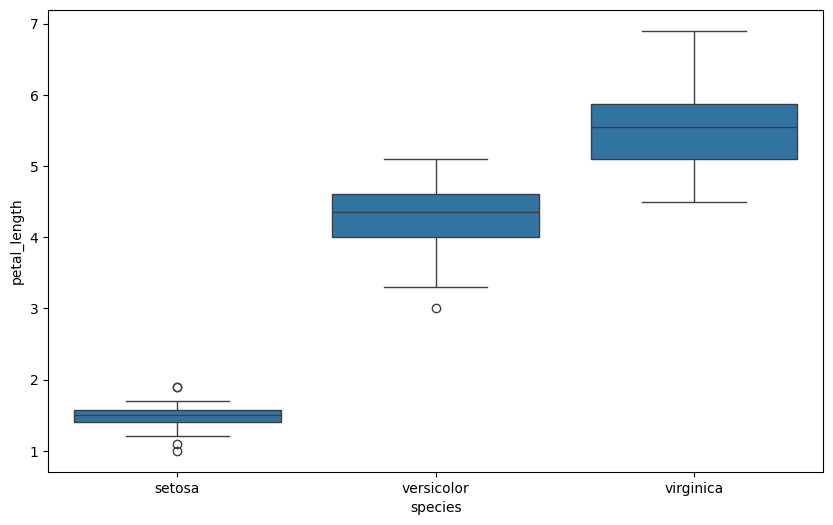

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=iris)

(해석)
1. setosa는 petal_length가 다른 두 종에 비해 현저히 짧으며, 분포의 범위도 매우 좁고 일정합니다.
2. virginica는 가장 긴 꽃잎 길이를 가진다.
3. versicolor species는 setosa와 virginica 중간에 분포한다. 
4. 세 종의 박스(IQR)가 서로 겹치지 않는 것으로 보아, petal_length만으로도 종을 구분하는 데 매우 유용한 변수임을 알 수 있습니다.

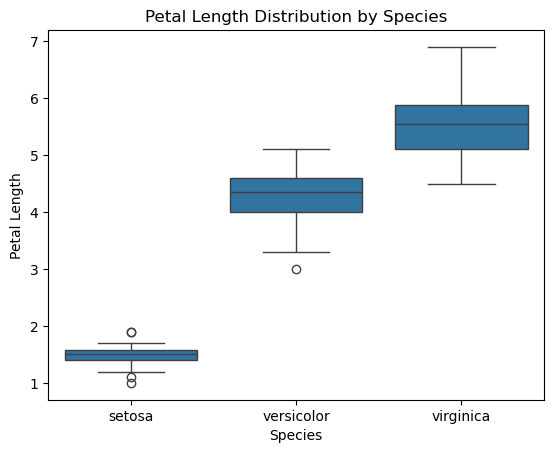

In [25]:
# 그래프 제목 및 라벨 설정해서 다시 그려보기
sns.boxplot(x='species', y='petal_length', data=iris)

plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.show()

## 4. 정규성 검정(Shapiro-Wilk)

In [27]:
# 종(species) 목록 추출
species_list = iris['species'].unique()
print(species_list)

['setosa' 'versicolor' 'virginica']


In [56]:
# 가설 수립
print("**가설 수립**")
for s in species_list :
    print(f"\n[{s}에 대한 가설]")
    print("귀무가설(H0) :", s, "의 데이터는 정규분포를 따른다.")
    print("대립가설(H1) :", s, "의 데이터는 정규분포를 따르지 않는다.")

**가설 수립**

[setosa에 대한 가설]
귀무가설(H0) : setosa 의 데이터는 정규분포를 따른다.
대립가설(H1) : setosa 의 데이터는 정규분포를 따르지 않는다.

[versicolor에 대한 가설]
귀무가설(H0) : versicolor 의 데이터는 정규분포를 따른다.
대립가설(H1) : versicolor 의 데이터는 정규분포를 따르지 않는다.

[virginica에 대한 가설]
귀무가설(H0) : virginica 의 데이터는 정규분포를 따른다.
대립가설(H1) : virginica 의 데이터는 정규분포를 따르지 않는다.


In [ ]:
# 정규성 검정
print("**검정 결과**") # -> pdf 첨부

for s in species_list:
    # 해당 종의 petal_length 데이터만 추출
    data = iris[iris['species'] == s]['petal_length']

    # Shapiro-Wilk 검정 수행
    stat, p_value = stats.shapiro(data)

    print(f"\n[{s}의 결과]")
    print(f"검정통계량: {stat:.4f}, p-value: {p_value:.4f}")

    # p-value 해석 (유의수준 95% 기준)
    if p_value >= 0.05:
        print("해석: p-value >= 0.05 이므로 정규성을 만족합니다.")
    else:
        print("해석: p-value < 0.05 이므로 정규성을 만족하지 않습니다.")

**검정 결과**

[setosa의 결과]
검정통계량: 0.9550, p-value: 0.0548
해석: p-value >= 0.05 이므로 정규성을 만족합니다.

[versicolor의 결과]
검정통계량: 0.9660, p-value: 0.1585
해석: p-value >= 0.05 이므로 정규성을 만족합니다.

[virginica의 결과]
검정통계량: 0.9622, p-value: 0.1098
해석: p-value >= 0.05 이므로 정규성을 만족합니다.


## 5. 등분산성 검정 (Levene)

In [83]:
# 1. 가설 수립
print("**가설 수립**")
print("귀무가설(H0): 세 그룹(Species)의 분산은 동일하다 (등분산성 만족).")
print("대립가설(H1): 적어도 한 그룹의 분산은 다르다 (등분산성 불만족).")

**가설 수립**
귀무가설(H0): 세 그룹(Species)의 분산은 동일하다 (등분산성 만족).
대립가설(H1): 적어도 한 그룹의 분산은 다르다 (등분산성 불만족).


In [46]:
# 2. data grouping
group1 = iris[iris['species'] == 'setosa']['petal_length']
group2 = iris[iris['species'] == 'versicolor']['petal_length']
group3 = iris[iris['species'] == 'virginica']['petal_length']

In [47]:
# 3. Levene 검정 수행
stat, p_value = stats.levene(group1, group2, group3)

print(f"검정통계량: {stat:.4f}")
print(f"p-value : {p_value:.4f}")

검정통계량: 19.4803
p-value : 0.0000


In [ ]:
# 4. 결과 해석 (0,05 수준) -> Pdf 첨부
print("**해석**")
if p_value >= 0.05:
    print(f"p-value({p_value:.4f}) >= 0.05 이므로 귀무가설 채택 (등분산성 만족)")
else:
    print(f"p-value({p_value:.4f}) < 0.05 이므로 귀무가설 기각 (등분산성 불만족)")

**해석**
p-value(0.0000) < 0.05 이므로 귀무가설 기각 (등분산성 불만족)


## ANOVA 분석

### 6. ANOVA 가설 수립

In [84]:
print("**ANOVA 가설 수립**")
print("귀무가설(H0): 세 species 간 Petal Length의 평균은 모두 같다.")
print("대립가설(H1): 적어도 하나의 species는 평균이 다른 종과 다르다.")

**ANOVA 가설 수립**
귀무가설(H0): 세 species 간 Petal Length의 평균은 모두 같다.
대립가설(H1): 적어도 하나의 species는 평균이 다른 종과 다르다.


### 7. One-way ANOVA

In [57]:
# 1. 그룹별 데이터 세팅
group_setosa = iris[iris['species'] == 'setosa']['petal_length']
group_versicolor = iris[iris['species'] == 'versicolor']['petal_length']
group_virginica = iris[iris['species'] == 'virginica']['petal_length']

In [58]:
# 2. ANOVA 분석 실행
f_stat, p_value = stats.f_oneway(group_setosa, group_versicolor, group_virginica)

In [61]:
# 3. 결과 출력
print("**ANOVA 분석 결과**")
print(f"F-statistic (F값) : {f_stat:.4f}")
print(f"p-value (유의확률): {p_value:.4e}") # 값이 매우 작을 수 있어 지수 표기법 사용

**ANOVA 분석 결과**
F-statistic (F값) : 1180.1612
p-value (유의확률): 2.8568e-91


In [ ]:
# 4. 가설 검정 결과 해석 -> Pdf 첨부
print("**ANOVA 분석 결과**")

alpha = 0.05
if p_value < alpha:
    print(f"결과: p-value가 {alpha}보다 작으므로 '귀무가설을 기각'합니다.")
    print("해석: 따라서 세 species 간 Petal Length의 평균에는 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"결과: p-value가 {alpha}보다 크거나 같으므로 '귀무가설을 기각하지 못합니다'.")
    print("해석: 세 species 간 Petal Length의 평균 차이가 통계적으로 유의하지 않습니다.")

**ANOVA 분석 결과**
결과: p-value가 0.05보다 작으므로 '귀무가설을 기각'합니다.
해석: 따라서 세 species 간 Petal Length의 평균에는 통계적으로 유의미한 차이가 있습니다.


## 8. 사후검정
-> 7번에서 ANOVA 결과가 유의했음

In [65]:
# 1. 데이터 세팅
endog = iris['petal_length']  # 데이터 (Petal Length)
groups = iris['species']      # 그룹 (Species)

In [66]:
# 2. Tukey HSD 수행
tukey = pairwise_tukeyhsd(endog=endog, groups=groups, alpha=0.05)

In [69]:
# 3. 결과 출력
print("**사후검정 결과**")
print(tukey)

**사후검정 결과**
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 9. 결과 요약

(pdf 첨부)
Boxplot 시각화와 ANOVA 분석 결과, 세 종(Species) 간의 Petal Length 평균에는 뚜렷한 차이가 있었습니다.

특히 Tukey HSD 사후검정을 통해 Virginica > Versicolor > Setosa 순서로 꽃잎 길이가 통계적으로 유의미하게 길다는 것을 확인했습니다. (모든 그룹 간 p-value < 0.05).

따라서 Virginica 종의 꽃잎이 가장 길고, Setosa 종의 꽃잎이 가장 짧다고 결론지을 수 있습니다.

## 10. 회귀 분석

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
# 1. 입력(X)과 타겟(y) 설정
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
y = iris['petal_length']

In [74]:
# 2. Train/Test 데이터 분리 (보통 8:2 비율 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# 3. Linear Regression 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [77]:
# 4. 예측 및 평가 (MSE, R2)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"1) 평균 제곱 오차 (MSE): {mse:.4f}")
print(f"2) 결정 계수 (R^2 Score): {r2:.4f}")

1) 평균 제곱 오차 (MSE): 0.1300
2) 결정 계수 (R^2 Score): 0.9603


In [81]:
# 5. 회귀 계수 출력
print("\n3) 회귀 계수 (Coefficients):")
for name, coef in zip(X.columns, model.coef_):
    print(f"   - {name}: {coef:.4f}")
print(f"   - 절편 (Intercept): {model.intercept_:.4f}")


3) 회귀 계수 (Coefficients):
   - sepal_length: 0.7228
   - sepal_width: -0.6358
   - petal_width: 1.4675
   - 절편 (Intercept): -0.2622


In [ ]:
# 6. 회귀분석 결과 해석 -> pdf 첨부
print("**회귀 분석 결과 해석**")
print(f"R^2 점수가 {r2:.2f}라는 것은 이 모델이 데이터의 변동성을 약 {r2*100:.1f}% 설명한다는 뜻으로,")
print("매우 높은 예측 성능을 보여준다고 할 수 있습니다.")

print("\n[변수별 영향력 해석]")
print("회귀 계수를 살펴보면, Petal Width의 계수가 약 1.47로 가장 크게 나타났습니다.")
print("이는 다른 조건이 동일할 때, 꽃잎 너비(Petal Width)가 1 증가하면 꽃잎 길이(Petal Length)는 약 1.47만큼 증가한다는 양의 상관관계를 의미합니다.")
print("따라서, 꽃잎 너비가 꽃잎 길이를 예측하는 데 가장 중요한 영향을 미치는 변수라고 해석할 수 있습니다.")

**회귀 분석 결과 해석**
R^2 점수가 0.96라는 것은 이 모델이 데이터의 변동성을 약 96.0% 설명한다는 뜻으로,
매우 높은 예측 성능을 보여준다고 할 수 있습니다.

[변수별 영향력 해석]
회귀 계수를 살펴보면, Petal Width의 계수가 약 1.47로 가장 크게 나타났습니다.
이는 다른 조건이 동일할 때, 꽃잎 너비(Petal Width)가 1 증가하면 꽃잎 길이(Petal Length)는 약 1.47만큼 증가한다는 양의 상관관계를 의미합니다.
따라서, 꽃잎 너비가 꽃잎 길이를 예측하는 데 가장 중요한 영향을 미치는 변수라고 해석할 수 있습니다.
